<a href="https://colab.research.google.com/github/jsebastianquiroga/analitica_ia_puj/blob/main/DL/RNR_Series%20de%20Tiempo%20-SRNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Recurrentes:


Las redes recurrentes son un tipo de arquitectura de redes neuronales diseñadas para modelar datos secuenciales o temporales. A diferencia de las redes neuronales convencionales, las redes recurrentes pueden capturar la dependencia a largo plazo en una secuencia al utilizar conexiones recurrentes que permiten a la red mantener y actualizar información a lo largo del tiempo. Esta capacidad las hace especialmente adecuadas para tareas que implican secuencias de datos, como el procesamiento del lenguaje natural, la traducción automática, el reconocimiento de voz y la generación de texto.

En una red recurrente, las unidades de procesamiento, llamadas celdas recurrentes, tienen una estructura interna que les permite mantener y propagar información a través de diferentes pasos de tiempo. Cada celda recurrente toma una entrada en el momento actual y también recibe información de su estado interno anterior. Esto le permite a la red aprender patrones y dependencias a largo plazo en la secuencia de datos.

A lo largo de los años, han surgido diferentes variantes de redes recurrentes, como las LSTM (Long Short-Term Memory) y las GRU (Gated Recurrent Units), que han mejorado el rendimiento en tareas de modelado de secuencias al abordar el problema del desvanecimiento de gradientes y permitir un mejor control de la información almacenada en la red.

En resumen, las redes recurrentes son una poderosa herramienta para modelar datos secuenciales y capturar patrones a largo plazo en secuencias. Su capacidad para procesar información temporal las hace ampliamente utilizadas en diversas aplicaciones de procesamiento de secuencias y han demostrado un gran éxito en el campo del aprendizaje automático.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth

from oauth2client.client import GoogleCredentials 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [13]:
stock = '1AZeSNFjcr0AzrAUlAqukxVvLERRfJBPs' 
download = drive.CreateFile({'id': stock}) 
download.GetContentFile('Google_Stock_Price_Train.csv')


dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")

training_set = dataset_train.iloc[:, 1:2].values #solamente valores de apertura

training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Escalado de características

 Se importa la clase 'MinMaxScaler' que se utilizará para llevar los valores de las características a un rango específico, en este caso, el rango entre 0 y 1.

Se crea una instancia de 'MinMaxScaler' llamada 'sc' y se especifica el rango de escala deseado. Luego, se aplica la función 'fit_transform' de 'sc' al conjunto de datos de entrenamiento ('training_set'). Esta función ajusta el escalador a los datos de entrenamiento y, al mismo tiempo, transforma los valores del conjunto de datos utilizando la escala especificada.

El conjunto de datos escalado se guarda en la variable 'training_set_scaled' y se utilizará posteriormente en el proceso de entrenamiento del modelo. La escalación de características es una técnica comúnmente utilizada para normalizar los datos y garantizar que todas las características tengan un rango comparable, lo que puede mejorar el rendimiento de los algoritmos de aprendizaje automático.

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

<ul>
  <li>Se especifica el número de pasos hacia atrás que se utilizarán en la secuencia de tiempo utilizando la variable pasos_atras.</li>
  <li>Se obtiene el número de datos en el conjunto de entrenamiento utilizando la propiedad shape del arreglo training_set_scaled.</li>
  <li>Se inicializan las listas X_train y y_train para almacenar las secuencias de entrada y las etiquetas de salida, respectivamente.</li>
  <li>Se itera a través de los datos desde pasos_atras hasta n_datos, y se van agregando las secuencias de datos anteriores como entrada en X_train y el dato siguiente como etiqueta de salida en y_train.</li>
  <li>Se convierten las listas X_train y y_train a matrices numpy utilizando la función np.array().</li>
  <li>Se realiza una transformación en la forma de los datos de entrada utilizando la función np.reshape(), de modo que X_train tenga una forma tridimensional necesaria para un modelo de red neuronal recurrente.</li>
  <li>Se convierte la matriz X_train en una cadena de texto con formato utilizando la función np.array2string(), especificando el formato de los números y el separador de columnas.</li>
  <li>Se imprime la cadena resultante.</li>
</ul>

In [16]:
# Se especifica el número de pasos hacia atrás que se utilizarán en la secuencia de tiempo
pasos_atras = 3

# Se obtiene el número de datos en el conjunto de entrenamiento
n_datos = training_set_scaled.shape[0]

# Se inicializan las listas para almacenar las secuencias de entrada (X_train) y las etiquetas de salida (y_train)
X_train = []
y_train = []

# Se itera a través de los datos desde 'pasos_atras' hasta 'n_datos'
for i in range(pasos_atras, n_datos):
    # Se añaden las secuencias de 'pasos_atras' datos anteriores como entrada
    X_train.append(training_set_scaled[i-pasos_atras:i, 0])
    # Se añade el dato siguiente como etiqueta de salida
    y_train.append(training_set_scaled[i, 0])

# Se convierten las listas a matrices numpy
X_train, y_train = np.array(X_train), np.array(y_train)

# Se realiza una transformación en la forma de los datos de entrada
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Se convierte la matriz X_train a una cadena de texto con formato
import os
cadena = np.array2string(X_train.squeeze(), formatter={'float_kind': lambda x: "{:.3f}".format(x)}, separator='\t', threshold=np.inf)

# Se imprime la cadena resultante
print(cadena)


[[0.086	0.097	0.094]
 [0.097	0.094	0.092]
 [0.094	0.092	0.080]
 [0.092	0.080	0.064]
 [0.080	0.064	0.059]
 [0.064	0.059	0.066]
 [0.059	0.066	0.061]
 [0.066	0.061	0.066]
 [0.061	0.066	0.061]
 [0.066	0.061	0.075]
 [0.061	0.075	0.028]
 [0.075	0.028	0.024]
 [0.028	0.024	0.024]
 [0.024	0.024	0.016]
 [0.024	0.016	0.011]
 [0.016	0.011	0.010]
 [0.011	0.010	0.016]
 [0.010	0.016	0.021]
 [0.016	0.021	0.023]
 [0.021	0.023	0.023]
 [0.023	0.023	0.028]
 [0.023	0.028	0.032]
 [0.028	0.032	0.043]
 [0.032	0.043	0.045]
 [0.043	0.045	0.048]
 [0.045	0.048	0.044]
 [0.048	0.044	0.046]
 [0.044	0.046	0.047]
 [0.046	0.047	0.049]
 [0.047	0.049	0.039]
 [0.049	0.039	0.041]
 [0.039	0.041	0.040]
 [0.041	0.040	0.048]
 [0.040	0.048	0.043]
 [0.048	0.043	0.044]
 [0.043	0.044	0.043]
 [0.044	0.043	0.046]
 [0.043	0.046	0.054]
 [0.046	0.054	0.057]
 [0.054	0.057	0.057]
 [0.057	0.057	0.056]
 [0.057	0.056	0.044]
 [0.056	0.044	0.045]
 [0.044	0.045	0.046]
 [0.045	0.046	0.044]
 [0.046	0.044	0.037]
 [0.044	0.037	0.045]
 [0.037	0.045

# Conjunto de pruebas

Se carga el dataset de prueba

In [17]:
stock_t = '1d2nu1LsbUG8pnGo50XkvH1s9GiOkcv1G' 
download = drive.CreateFile({'id': stock_t}) 
download.GetContentFile('Google_Stock_Price_Test.csv')

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

# Modelo 1: Construccion RNR

el modelo secuencial de Keras para construir una arquitectura de red. Esta red tiene como objetivo resolver un problema de regresión, ya que la variable objetivo tiene un solo valor numérico.

La arquitectura de la red consta de varias capas de neuronas recurrentes simples (SimpleRNN) que tienen activación tangente hiperbólica (tanh). Estas capas están diseñadas para mantener la secuencialidad de los datos de entrada, lo que es importante para trabajar con secuencias de tiempo. Cada capa utiliza dropout para regularizar la red y evitar el sobreajuste.

La red se compila utilizando la función de pérdida de error cuadrático medio (mean_squared_error) y el optimizador Adam. Además de la métrica predeterminada de precisión (acc), también se utiliza la métrica de error cuadrático medio (mse) para evaluar el rendimiento del modelo.

Se entrena la red utilizando un número específico de épocas y un tamaño de lote (batch_size). Se registra el tiempo de entrenamiento y se imprime al finalizar.

Esta red neuronal recurrente se utiliza para modelar y predecir datos secuenciales, y su rendimiento se evalúa en función de la pérdida y las métricas de precisión y error cuadrático medio.

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Crear un modelo secuencial
red = Sequential()

# Definir el número de clases objetivo
numero_clases = 1

# Capa 1: SimpleRNN
capa_1 = SimpleRNN(50, 
                   activation="tanh",
                   use_bias=True,
                   dropout=0.2, 
                   recurrent_dropout=0.2, 
                   return_sequences=True,
                   input_shape=(X_train.shape[1], 1))

# Capa 2: SimpleRNN
capa_2 = SimpleRNN(50, 
                   activation="tanh",
                   use_bias=True,
                   dropout=0.2, 
                   recurrent_dropout=0.2, 
                   return_sequences=True)

# Capa 3: SimpleRNN
capa_3 = SimpleRNN(50, 
                   activation="tanh",
                   use_bias=True,
                   dropout=0.2, 
                   recurrent_dropout=0.2, 
                   return_sequences=True)

# Capa 4: SimpleRNN
capa_4 = SimpleRNN(50, 
                   activation="tanh",
                   use_bias=True,
                   dropout=0.2, 
                   recurrent_dropout=0.2)

# Capa 5: Dense
capa_5 = Dense(numero_clases,
               use_bias=True,
               activation='relu')

# Agregar las capas al modelo
red.add(capa_1)
red.add(capa_2)
red.add(capa_3)
red.add(capa_4)
red.add(capa_5)

# Compilar el modelo
red.compile(loss='mean_squared_error', 
            optimizer='adam', 
            metrics=['acc', 'mse'])

# Mostrar un resumen del modelo
red.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3, 50)             2600      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 3, 50)             5050      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 3, 50)             5050      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 17,801
Trainable params: 17,801
Non-trainable params: 0
_________________________________________________________________


El código muestra cómo se define una red neuronal recurrente (RNN) utilizando el modelo secuencial de Keras. La red consta de varias capas de SimpleRNN, que son capas recurrentes que mantienen la secuencialidad de los datos de entrada. Cada capa tiene una función de activación tangente hiperbólica (tanh) y se utiliza dropout para regularizar la red y evitar el sobreajuste.

Se agrega una capa Dense final para la salida de la red, con una activación ReLU. El modelo se compila con la función de pérdida de error cuadrático medio (mean_squared_error), el optimizador Adam y se especifican las métricas de precisión (acc) y error cuadrático medio (mse) para evaluar el rendimiento del modelo.

Finalmente, se muestra un resumen del modelo que muestra la estructura de la red, el número de parámetros entrenables y otras estadísticas relevantes.

In [30]:
np.shape(X_train)
np.shape(y_train)

epocas=100
batch_size=32

import time
start = time.perf_counter()
rnr=red.fit(X_train,y_train,
            batch_size=batch_size,
            epochs=epocas #Cuantas epocas usaremos para entrenar
            #,validation_data=(X_test, y_test)
            #,shuffle=True
            #,validation_split=0.2
           )
end = time.perf_counter()
print(f'Tiempo:  {end - start:.3f} Segundos')

(1255, 3, 1)

In [22]:
import time

epocas=100
batch_size=32

# Measure the start time
start = time.perf_counter()

# Fit the model with the training data
rnr = red.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epocas,  # Number of epochs for training
              # validation_data=(X_test, y_test),
              # shuffle=True,
              # validation_split=0.2
              )

# Measure the end time
end = time.perf_counter()

# Print the elapsed time in seconds
print(f'Tiempo: {end - start:.3f} Segundos')

Epoch 1/100
40/40 [==============================] - 7s 11ms/step - loss: 0.1306 - acc: 7.9681e-04 - mse: 0.1306
Epoch 2/100
40/40 [==============================] - 0s 11ms/step - loss: 0.0630 - acc: 7.9681e-04 - mse: 0.0630
Epoch 3/100
40/40 [==============================] - 0s 10ms/step - loss: 0.0449 - acc: 7.9681e-04 - mse: 0.0449
Epoch 4/100
40/40 [==============================] - 0s 10ms/step - loss: 0.0317 - acc: 0.0016 - mse: 0.0317
Epoch 5/100
40/40 [==============================] - 0s 9ms/step - loss: 0.0278 - acc: 0.0016 - mse: 0.0278
Epoch 6/100
40/40 [==============================] - 0s 10ms/step - loss: 0.0242 - acc: 0.0016 - mse: 0.0242
Epoch 7/100
40/40 [==============================] - 0s 10ms/step - loss: 0.0226 - acc: 0.0016 - mse: 0.0226
Epoch 8/100
40/40 [==============================] - 0s 10ms/step - loss: 0.0187 - acc: 0.0016 - mse: 0.0187
Epoch 9/100
40/40 [==============================] - 0s 10ms/step - loss: 0.0225 - acc: 0.0016 - mse: 0.0225
Epoch 10

# Predicciones

### concatenamos el conjunto de prueba con el conjunto de test bajo la columna que se está realizando la impresion 

In [23]:
# Concatenate the 'Open' column from the training and test datasets
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

# Extract the inputs for prediction from the concatenated dataset
inputs = dataset_total.iloc[len(dataset_total) - len(dataset_test) - pasos_atras:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Get the size of the input for prediction
tam_entrada = inputs.shape[0]

# Create the input sequences for prediction
X_test = []
for i in range(pasos_atras, tam_entrada):
    X_test.append(inputs[i - pasos_atras:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict the stock price using the trained model
predicted_stock_price = red.predict(X_test)

# Rescale the predicted stock price back to the original scale
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizacion de los datos

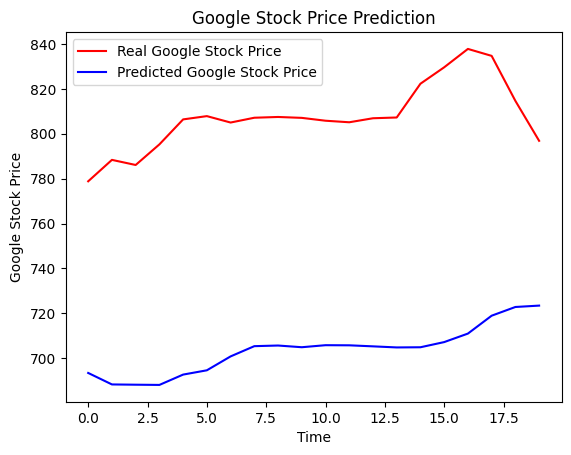

In [27]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Modelo LSTM: 

uno de los enfoques más utilizados y eficaces en la predicción de precios de acciones es el modelo de redes neuronales recurrentes (RNN) con unidades LSTM (Long Short-Term Memory).

El modelo LSTM se utiliza para capturar patrones a largo plazo en los datos de series temporales, lo que puede ser beneficioso para predecir los precios de las acciones, que a menudo tienen dependencias y tendencias a largo plazo. A diferencia de las RNN estándar, las unidades LSTM tienen una memoria a largo plazo que les permite recordar información relevante y evitar el problema del desvanecimiento del gradiente.

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

import time
start = time.perf_counter()


model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train,y_train,
            batch_size=batch_size,
            epochs=epocas #Cuantas epocas usaremos para entrenar
            #,validation_data=(X_test, y_test)
            #,shuffle=True
            #,validation_split=0.2
           )


end = time.perf_counter()
print(f'Tiempo:  {end - start:.3f} Segundos')

Epoch 1/100
40/40 [==============================] - 3s 4ms/step - loss: 0.2233
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0650
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 4.5294e-04
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 4.0955e-04
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 3.9916e-04
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 3.9264e-04
Epoch 8/100
40/40 [==============================] - 0s 5ms/step - loss: 4.0559e-04
Epoch 9/100
40/40 [==============================] - 0s 4ms/step - loss: 3.9021e-04
Epoch 10/100
40/40 [==============================] - 0s 5ms/step - loss: 3.8858e-04
Epoch 11/100
40/40 [==============================] - 0s 5ms/step - loss: 3.8432e-04
Epoch 12/100
40/40 [==============================] - 0s 5ms/step - loss: 3.8560e-04
E

In [32]:
# Concatenate the 'Open' column from the training and test datasets
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

# Extract the inputs for prediction from the concatenated dataset
inputs = dataset_total.iloc[len(dataset_total) - len(dataset_test) - pasos_atras:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Get the size of the input for prediction
tam_entrada = inputs.shape[0]

# Create the input sequences for prediction
X_test = []
for i in range(pasos_atras, tam_entrada):
    X_test.append(inputs[i - pasos_atras:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict the stock price using the trained model
predicted_stock_price_2 = model.predict(X_test)

# Rescale the predicted stock price back to the original scale
predicted_stock_price_2 = sc.inverse_transform(predicted_stock_price_2)

1/1 [==============================] - 0s 188ms/step


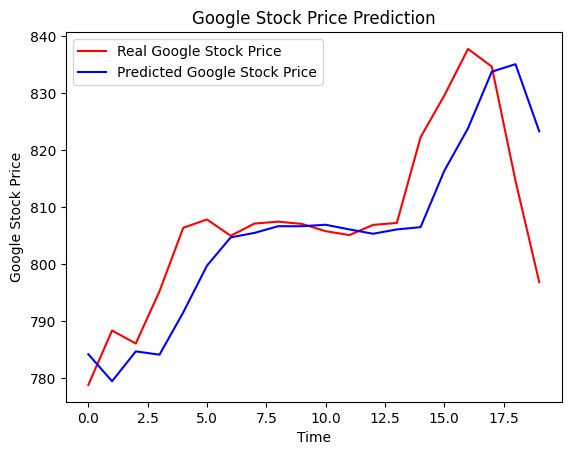

In [33]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_2, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()